# Classification models and NLP in R
***This is the follow-up notebook, in which we're going to perform classification on the dataset we constructed in the previous notebook.***

In [1]:
library(caret)
library(ggplot2)
install.packages('e1071', dependencies = TRUE)
install.packages('kernlab', dependencies = TRUE)

X_train <- read.csv('xtrain.csv', header = TRUE)
X_train <- data.frame(X_train)

X_test <- read.csv('xtest.csv', header = TRUE)
X_test <- data.frame(X_test)

y_train <- read.csv('ytrain.csv', header = TRUE)
y_train <- data.frame(y_train)

y_test <- read.csv('ytest.csv', header = TRUE)
y_test <- data.frame(y_test)

Loading required package: lattice
Loading required package: ggplot2
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
head(X_train)

X,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words
35641,0,1,0,1,24,17,3,0,150,2571,23
43780,0,0,0,0,4,6,0,0,80,959,12
19131,0,0,0,0,5,6,0,0,79,822,13
30005,0,0,1,0,25,36,1,1,80,2628,11
13663,0,1,0,0,32,45,0,0,72,3441,11
33686,0,0,0,0,27,19,0,0,106,2721,12


In [3]:
class(X_train)

[1] "data.frame"

In [4]:
head(y_test)

X,is_fake
34059,1
10347,0
25271,1
1750,0
29550,1
39599,1


In [5]:
class(y_test)

[1] "data.frame"

In [6]:
head(X_test)

X,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words
34059,0,2,0,0,51,42,3,0,125,4473,17
10347,0,0,0,0,4,2,0,0,56,518,9
25271,0,0,0,0,12,16,1,1,103,1877,17
1750,2,1,0,0,23,23,0,0,68,3595,8
29550,0,1,0,0,19,21,2,0,81,2615,13
39599,0,0,0,1,13,21,0,0,135,2143,18


In [7]:
head(y_train)

X,is_fake
35641,1
43780,1
19131,0
30005,1
13663,0
33686,1


In [8]:
train <- merge(X_train, y_train)
row.names(train) <- train$X
train <- train[-1]
train$is_fake <- as.factor(train$is_fake)
head(train)

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words,is_fake
0,2,1,0,0,49,54,0,0,64,4659,10,0
1,2,0,0,0,37,29,0,0,64,4077,9,0
2,3,0,0,0,22,19,0,0,60,2789,10,0
4,0,0,0,0,58,51,1,1,69,5204,11,0
5,0,2,0,0,36,31,0,0,64,3707,9,0
7,0,1,0,0,12,9,1,2,60,856,10,0


In [9]:
test <- merge(X_test, y_test)
row.names(test) <- test$X
test = test[-1]
test$is_fake <- as.factor(test$is_fake)
head(test)

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words,is_fake
3,0,0,0,0,21,23,0,0,59,2461,9,0
6,0,1,0,0,36,22,0,0,63,3220,11,0
11,0,0,0,0,37,34,0,0,73,3829,10,0
31,0,0,0,0,14,15,0,0,53,1375,8,0
33,0,0,0,0,22,16,0,0,68,2039,10,0
36,0,1,0,0,33,27,0,0,67,3423,10,0


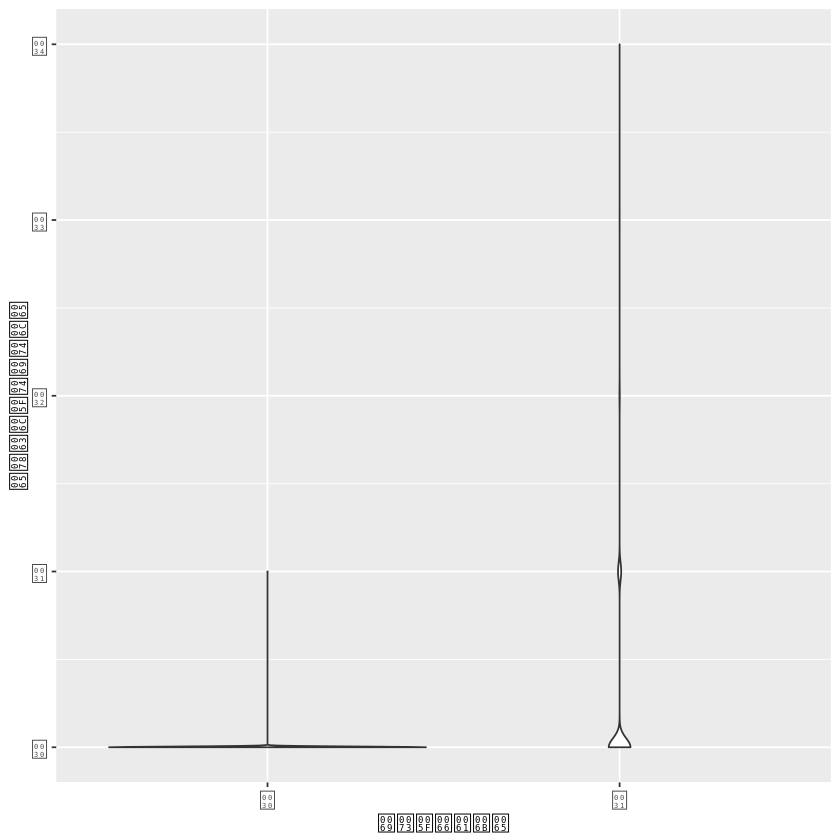

In [10]:
p <- ggplot(train, aes(x = is_fake, y = excl_title)) +
    geom_violin()

p

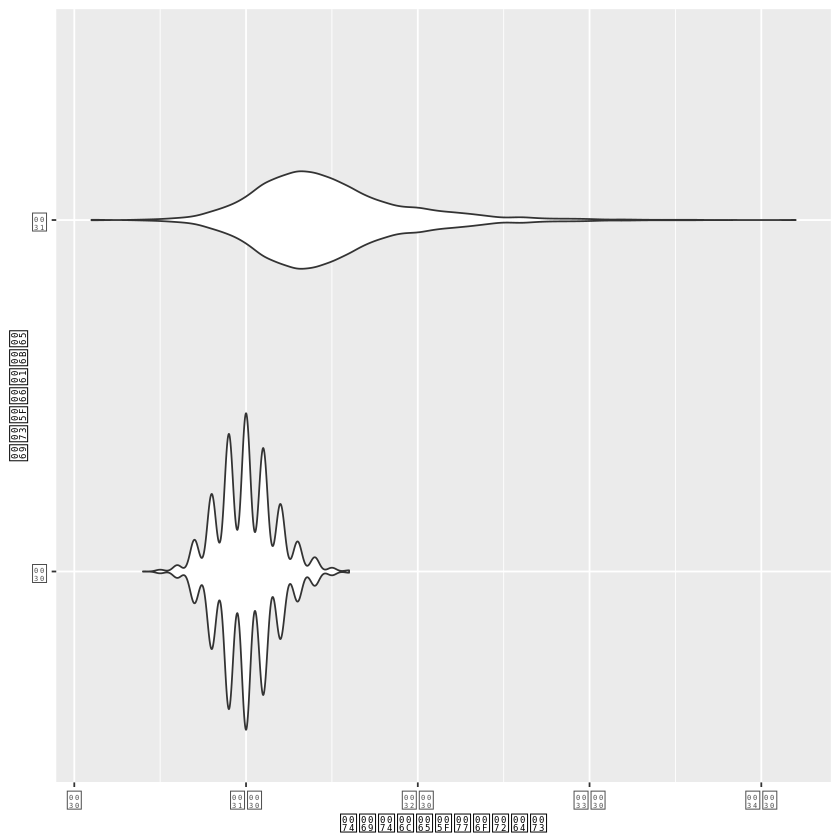

In [11]:
pz <- ggplot(test, aes(x = is_fake, y = title_words)) +
    geom_violin() +
    coord_flip()

pz

In [12]:
summary(train)

   peri_title       comm_title       ques_title        excl_title     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.00000  
 Mean   :0.2742   Mean   :0.2248   Mean   :0.04198   Mean   :0.08185  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :6.0000   Max.   :5.0000   Max.   :3.00000   Max.   :4.00000  
   peri_text        comm_text        ques_text       excl_text       
 Min.   :  0.00   Min.   :  0.00   Min.   : 0.00   Min.   :  0.0000  
 1st Qu.: 10.00   1st Qu.:  8.00   1st Qu.: 0.00   1st Qu.:  0.0000  
 Median : 18.00   Median : 17.00   Median : 0.00   Median :  0.0000  
 Mean   : 20.95   Mean   : 20.24   Mean   : 0.68   Mean   :  0.4075  
 3rd Qu.: 27.00   3rd Qu.: 26.00   3rd Qu.: 1.00   3rd Qu.:  0.0000  
 Max.   :555.00   Max.   :518.00   Max.   :94.00   Max.   :133.0000  
  title_lengt

In [13]:
sapply(train, class)

peri_title   comm_title   ques_title   excl_title    peri_text    comm_text 
   "integer"    "integer"    "integer"    "integer"    "integer"    "integer" 
   ques_text    excl_text title_length  text_length  title_words      is_fake 
   "integer"    "integer"    "integer"    "integer"    "integer"     "factor"

In [14]:
validation_index <- createDataPartition(train$is_fake, p = 0.80, list = FALSE)
validation <- train[-validation_index,]
train <- train[validation_index,]

In [15]:
control <- trainControl(method = 'cv', number = 10)
metric <- 'Accuracy'

***The datasets are imported successfully.***
## LDA, CART, KNN, SVM, RF

In [16]:
fit.lda <- train(is_fake~., data = train, method = 'lda', metric = metric, trControl = control)

fit.cart <- train(is_fake~., data = train, method = 'rpart', metric = metric, trControl = control)

fit.knn <- train(is_fake~., data = train, method = 'knn', metric = metric, trControl = control)

fit.svm <- train(is_fake~., data = train, method = 'svmRadial', metric = metric, trControl = control)

fit.rf <- train(is_fake~., data = train, method = 'rf', metric = metric, trControl = control)

In [17]:
results <- resamples(list(lda = fit.lda, cart = fit.cart, knn = fit.knn, svm = fit.svm, rf = fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.8579882 0.8655586 0.8688239 0.8690092 0.8739235 0.8796103    0
cart 0.8472512 0.8545455 0.8578141 0.8596836 0.8642017 0.8729551    0
knn  0.8392484 0.8465153 0.8505303 0.8515405 0.8568569 0.8646015    0
svm  0.8973556 0.9056816 0.9086321 0.9080217 0.9113296 0.9164927    0
rf   0.9133310 0.9192763 0.9237864 0.9227425 0.9264897 0.9286460    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda  0.7175148 0.7325540 0.7389746 0.7394072 0.7491420 0.7603570    0
cart 0.6938468 0.7084462 0.7148734 0.7185490 0.7273938 0.7449717    0
knn  0.6796362 0.6939272 0.7022124 0.7040595 0.7145333 0.7302749    0
svm  0.7949340 0.8115458 0.8175744 0.8162363 0.8227395 0.8330623    0
rf   0.8264321 0.8384265 0.8473183 0.8452999 0.8527825 0.8569997    0


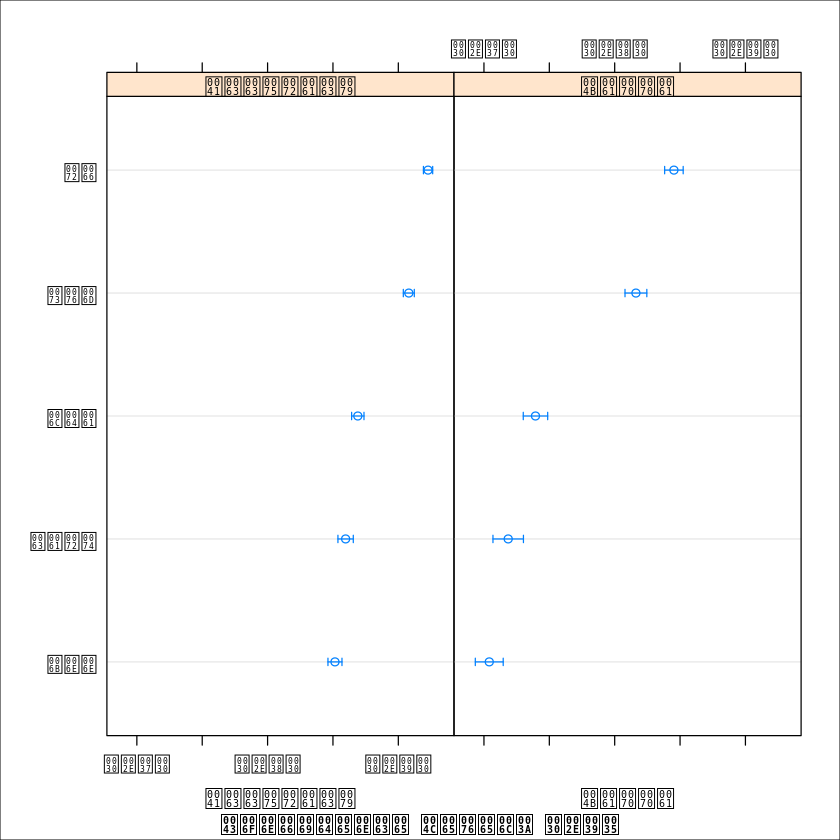

In [18]:
dotplot(results)

***It appears Random Forests have the highest accuracy of all five algorithms, placed at ~92.5%. Let's make predictions on the test set using that model.***

In [19]:
print(fit.rf)

Random Forest 

28735 samples
   11 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 25861, 25862, 25861, 25862, 25861, 25862, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9170699  0.8341658
   6    0.9227425  0.8452999
  11    0.9203413  0.8404728

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.


In [20]:
predictions <- predict(fit.rf, validation)
confusionMatrix(predictions, validation$is_fake)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 3216  296
         1  206 3465
                                         
               Accuracy : 0.9301         
                 95% CI : (0.924, 0.9359)
    No Information Rate : 0.5236         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8601         
                                         
 Mcnemar's Test P-Value : 7.119e-05      
                                         
            Sensitivity : 0.9398         
            Specificity : 0.9213         
         Pos Pred Value : 0.9157         
         Neg Pred Value : 0.9439         
             Prevalence : 0.4764         
         Detection Rate : 0.4477         
   Detection Prevalence : 0.4889         
      Balanced Accuracy : 0.9305         
                                         
       'Positive' Class : 0              
                                         

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


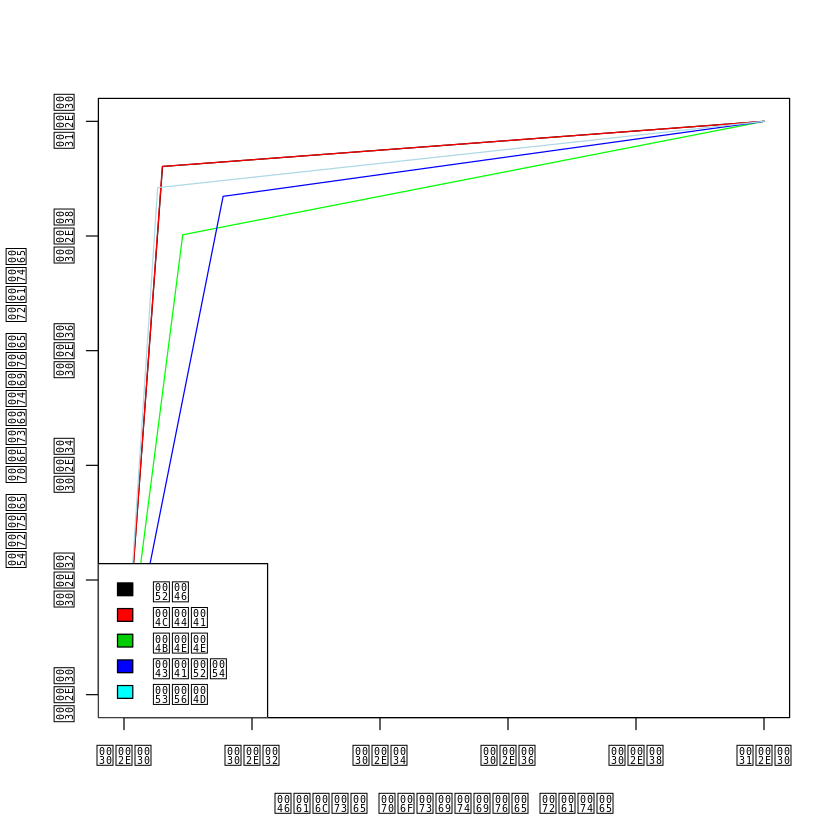

In [21]:
install.packages('ROCR')
library(ROCR)

colors <- c('black', 'red', 'green', 'blue', 'lightblue')
m <- length(predictions)

# rf predictions
predvec <- ifelse(predictions == '1', 1, 0)
realvec <- ifelse(validation$is_fake == '1', 1, 0)
pred <- prediction(predvec, realvec)
perf <- performance(pred, 'tpr', 'fpr')
plot(perf, col = colors[1])

# lda predictions
lda_predictions <- predict(fit.rf, validation)
lda_predvec <- ifelse(lda_predictions == '1', 1, 0)
lda_pred <- prediction(lda_predvec, realvec)
lda_perf <- performance(lda_pred, 'tpr', 'fpr')
plot(lda_perf, add = TRUE, col = colors[2])

# knn predictions
knn_predictions <- predict(fit.knn, validation)
knn_predvec <- ifelse(knn_predictions == '1', 1, 0)
knn_pred <- prediction(knn_predvec, realvec)
knn_perf <- performance(knn_pred, 'tpr', 'fpr')
plot(knn_perf, add = TRUE, col = colors[3])

# cart predictions
cart_predictions <- predict(fit.cart, validation)
cart_predvec <- ifelse(cart_predictions == '1', 1, 0)
cart_pred <- prediction(cart_predvec, realvec)
cart_perf <- performance(cart_pred, 'tpr', 'fpr')
plot(cart_perf, add = TRUE, col = colors[4])

# svm predictions
svm_predictions <- predict(fit.svm, validation)
svm_predvec <- ifelse(svm_predictions == '1', 1, 0)
svm_pred <- prediction(svm_predvec, realvec)
svm_perf <- performance(svm_pred, 'tpr', 'fpr')
plot(svm_perf, add = TRUE, col = colors[5])

legend(x = 'bottomleft', legend = c('RF', 'LDA', 'KNN', 'CART', 'SVM'), fill = 1:m)

***So, to summarize the work done in the last notebook and this one so far, we engineered our own features from the datasets and managed to attain 92%+ accuracy when classifying. Next, we're going to apply other NLP methods and see if we can get even better results.***

In [69]:
true_news <- read.csv('news/True.csv')
fake_news <- read.csv('news/Fake.csv')

In [70]:
head(true_news)

title,text,subject,date


In [71]:
head(fake_news)

title,text,subject,date
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that th

In [72]:
true_news$is_fake <- 0
fake_news$is_fake <- 1

#true_news$ID <- seq.int(nrow(true_news))
#fake_news$ID <- seq.int(from = nrow(true_news) + 1, to = nrow(true_news) + nrow(fake_news))
news <- rbind(true_news, fake_news)

news$ID <- seq.int(nrow(news))
news <- news[sample(nrow(news)),]
head(news)

,title,text,subject,date,is_fake,ID
29155,This Ted Cruz ‘Bad Lip Reading’ Is Everything You Never Knew You Wanted And More (VIDEO),"With the Republican side of this presidential race turning out to be the most horrifically embarrassing thing that has ever happened in the history of the republic, it s good to enjoy some comic relief from time to time to take your mind off of how awful things really are. With Donald Trump in the lead for GOP nominee and Sen. Ted Cruz (R-TX) not far behind, one has to wonder if the Republican party has gone and lost their ever-loving mind.To provide some much-needed comic relief is none other than the folks over at Bad Lip Reading. They ve been putting hilarious words into the mouths of athletes, celebrities and politicians for some time now, and now in what may be their best bad lip reading yet, they ve gone after Captain Smarmy himself, Ted Cruz.Usually, when watching a BLR it will be mostly gibberish and you will laugh at how closely the words match up to who they are parodying. However, this time around, there s a full story-line and it is absolutely spot on. From putting the words into Cruz s mouth, to his wife s, to his children s to those he s met along the campaign trail. Although, in true BLR form, they did give Cruz a new campaign slogan: I Need a Bogel for the Glotch. Knowing Cruz, though, it might be something he d actually say to pander to Bogel and Glotch makers. (kidding)Without further ado, here s Bad Lip Reading s Ted Cruz :Featured image: YouTube/photoshop",News,"March 2, 2016",1,29155
36157,THE 2016 Calendar That Won’t Be Hanging In ISIS Caves Or Obama’s Oval Office,"Vladimir Putin the anti-Obama Fans of the maverick Russian president can now gaze upon him every day for the bargain price of just 78 Roubles (72p) by buying his bizarre and wonderful 2016 calendar.The momentous tribute to the iron-fisted leader features him in a typically outlandish range of poses, from fishing topless to cuddling a fluffy puppy.Each page portrays the legendary president s tough and sensitive sides, with him boasting about the prowess of the Russian military one month and professing his love of dogs the next.And it seems that Russians simply cannot get enough of their leader with the glossy calendar selling out in Moscow.But it is unlikely to adorn the walls of many Islamic State (ISIS) hideouts, with the hard man supremo s bombing blitz in Syria contributing to the terrorist group s accelerating collapse.Mr Putin seemingly alludes to the current military operations against ISIS, with some critics saying he has outflanked and out-thought Western leaders.The October entry features the stern Russian president wearing a military cap and striped shirt alongside a slogan proclaiming his country s military might.It states: No one will succeed in gaining military superiority over Russia. Our army is contemporary, capable, and as they now say, polite, but formidable. Via: Express UK",politics,"Dec 28, 2015",1,36157
5405,Trump says U.S. media reports making it hard to strike deal with Russia,"WASHINGTON (Reuters) - President Donald Trump on Thursday said reports in the U.S. media about his administration’s relationship with Russia may make it difficult for him to strike a deal with Russian President Vladimir Putin to ease tensions between Washington and Moscow. “Putin probably assumes that he can’t make a deal with me any more because politically it would be unpopular for a politician to make a deal,” Trump said at a press conference.",politicsNews,"February 16, 2017",0,5405
746,"Repeal of individual mandate would increase uninsured, premiums: CBO","WASHINGTON (Reuters) - The Congressional Budget Office said on Wednesday that repealing the Obamacare individual mandate would increase the number of uninsured by 13 million by 2027 and reduce the federal budget deficit less than initially forecast. The CBO, the nonpartisan budget-scoring agency, said that eliminating the Obamacare mandate that all Americans pu

In [73]:
dim(news)

[1] 44898     6

***It appears the combined dataset has 44898 columns. We're going to use 36898 for training and the remaining 8000 for testing.***

In [74]:
# set numerical IDs for each data example
news$ID <- seq.int(nrow(news))
TRAINING_EXAMPLES <- 36898

all_ids <- news$ID
train_ids <- sample(all_ids, TRAINING_EXAMPLES)
test_ids <- setdiff(all_ids, train_ids)
train <- news[train_ids, ]
test <- news[test_ids, ]

In [75]:
dim(train)

[1] 36898     6

In [76]:
dim(test)

[1] 8000    6

## Vocabulary-based vectorization
***Let’s first create a vocabulary-based DTM. Here we collect unique terms from all documents and mark each of them with a unique ID using the create_vocabulary() function. We use an iterator to create the vocabulary.***

In [77]:
install.packages('text2vec')
install.packages('data.table')
install.packages('magrittr')

library(text2vec)
library(data.table)
library(magrittr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [119]:
prep_func <- tolower
tok_func <- word_tokenizer

train$text <- as.character(train$text)
it_train <- itoken(train$text,   # token iterator
                   preprocessor = prep_func,
                   tokenizer = tok_func,
                   ids = train$ID)
vocab <- create_vocabulary(it_train)

In [120]:
vocab

term,term_count,doc_count
0.00000017,1,1
0.001,1,1
0.0011,1,1
0.0018,1,1
0.005,1,1
0.0076,1,1
0.07,1,1
0.11,1,1
0.14,1,1
0.189,1,1


***We can observe some pretty expectable results : Most of the top frequency words are in fact stop words. There also seem to be a certain amount of numerical tokens(0.11, 0.5573 etc.). I find them very irrelevant, so I'll have the removed.*** 

In [121]:
sapply(vocab, class)

term  term_count   doc_count 
"character"   "integer"   "integer"

In [122]:
vocab <- vocab[!grepl('[[:digit:]]', vocab$term),]

In [123]:
vocab

,term,term_count,doc_count
6339,_______,1,1
6340,___________,1,1
6341,__________________________,1,1
6342,_____________________________________________________________________________________featured,1,1
6343,_____________________________________________________________________________________photo,1,1
6344,____________________________________________________________________________________image,1,1
6345,__________________adolf,1,1
6346,___q__,1,1
6347,__mref,1,1
6348,__saada,1,1


In [124]:
vocab <- vocab[!grepl('_', vocab$term),]

In [125]:
vocab

,term,term_count,doc_count
6375,a.a:this.b,1,1
6376,a.aa,1,1
6378,a.appendchild,1,1
6379,a.back,1,1
6380,a.bind,1,1
6381,a.c.style.display,1,1
6382,a.call.apply,1,1
6383,a.charcodeat,1,1
6385,a.complete,1,1
6388,a.currentstyle,1,1


In [126]:
vocab <- vocab[!grepl('[.:@#%,]', vocab$term),]
vocab

,term,term_count,doc_count
6491,aaaaapkfhk,1,1
6492,aaaahhhh,1,1
6493,aaarf,1,1
6494,aaba,1,1
6495,aaccording,1,1
6497,aagxdwkrjpq,1,1
6498,aai,1,1
6499,aaja,1,1
6500,aaldef,1,1
6501,aammir,1,1


***We've removed all weird entries containing symbols, numbers etc. There also seem to be some weirdly spelled words, which we'll try to remove by removing the entries appearing less than 5 times throughout the entire dataset and/or less than 5 documents as they are likely not of any use to us.***

In [127]:
vocab <- vocab[vocab$term_count > 5, ]
vocab

,term,term_count,doc_count
142329,abcliz,6,5
142330,abdikadir,6,6
142331,abdoulaye,6,6
142332,abdulgader,6,1
142333,abedin’s,6,5
142334,abode,6,6
142336,aboutaleb,6,3
142337,abovementioned,6,6
142339,absolutist,6,6
142340,absolves,6,6


In [128]:
vocab <- vocab[vocab$doc_count > 5, ]
vocab

,term,term_count,doc_count
142330,abdikadir,6,6
142331,abdoulaye,6,6
142334,abode,6,6
142337,abovementioned,6,6
142339,absolutist,6,6
142340,absolves,6,6
142342,academies,6,6
142344,accents,6,6
142345,acclaim,6,6
142347,accrued,6,6


In [129]:
vectorizer <- vocab_vectorizer(vocab)
dtm_train <- create_dtm(it_train, vectorizer)

In [130]:
dim(dtm_train)

[1] 36898 32689

In [131]:
identical(rownames(dtm_train), train$ID)

[1] TRUE

In [132]:
train$ID <- rownames(dtm_train)

## Logistic regression model on the DTM

In [133]:
install.packages('glmnet')
library(glmnet)
NFOLDS <- 10

train$is_fake <- as.factor(train$is_fake)
glmnet_classifier <- cv.glmnet(x = dtm_train, y = train[['is_fake']], 
                              family = 'binomial', 
                              # L1 penalty
                              alpha = 0.5,
                              # interested in the area under ROC curve
                              type.measure = 'auc',
                              # 10-fold cross-validation
                              nfolds = NFOLDS,
                              # high value is less accurate, but has faster training
                              thresh = 1e-4,
                              # again lower number of iterations for faster training
                              maxit = 7000)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


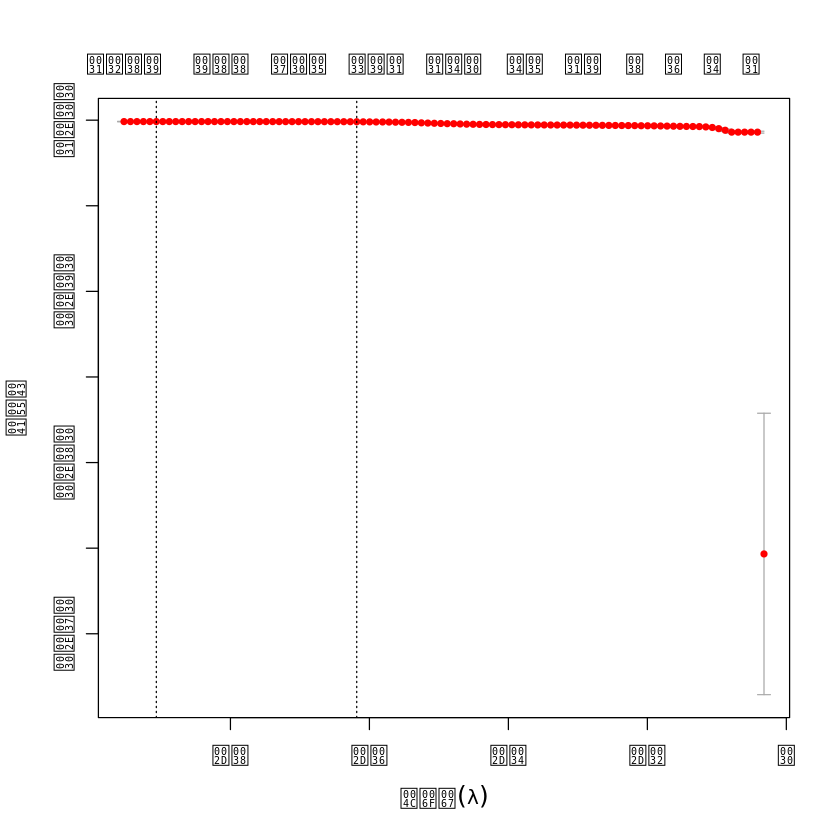

In [134]:
plot(glmnet_classifier)

In [135]:
it_test <- tok_func(prep_func(test$text))
# turn off progressbar because it won't look nice in rmd
it_test <- itoken(it_test, ids = test$ID, progressbar = FALSE)
         

dtm_test <- create_dtm(it_test, vectorizer)

preds <- predict(glmnet_classifier, dtm_test, type = 'response')[,1]
glmnet:::auc(test$is_fake, preds)

[1] 0.9985186

***And there we have it. 99.84% accuracy with just a simple DTM, without any stemming or stop words removal.***

In [137]:
install.packages('stopwords')
library(stopwords)

stop_words <- stopwords::stopwords('english')
head(stop_words, 20)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"

In [139]:
vocab <- create_vocabulary(it_train, stopwords = stop_words)
pruned_vocab <- prune_vocabulary(vocab, 
                                 term_count_min = 10, 
                                 doc_proportion_max = 0.5,
                                 doc_proportion_min = 0.001)
vectorizer <- vocab_vectorizer(pruned_vocab)

# create dtm_train with new pruned vocabulary vectorizer
dtm_train <- create_dtm(it_train, vectorizer)

In [140]:
dim(dtm_train)

[1] 36898 13822

In [141]:
dtm_test <- create_dtm(it_test, vectorizer)
dim(dtm_test)

[1]  8000 13822

***Here we used a different way of handling the data cleaning, the prune_vocabulary() function from text2vec package. We are left with almost three times less words with these parameters.***

## TF-IDF

In [142]:
tfidf <- TfIdf$new()

# fit model to train data and transform train data with fitted model
dtm_train_tfidf <- fit_transform(dtm_train, tfidf)

dtm_test_tfidf <- create_dtm(it_test, vectorizer)
dtm_test_tfidf <- transform(dtm_test_tfidf, tfidf)

In [143]:
tfidf_glmnet_classifier <- cv.glmnet(x = dtm_train_tfidf, y = train[['is_fake']], 
                              family = 'binomial', 
                              alpha = 0.5,
                              type.measure = 'auc',
                              nfolds = NFOLDS,
                              thresh = 1e-4,
                              maxit = 7000)

In [144]:
preds <- predict(tfidf_glmnet_classifier, dtm_test_tfidf, type = 'response')[,1]
glmnet:::auc(test$is_fake, preds)

[1] 0.999745